# Doing Exploratory Data Analysis On Insurances Dataset.
Submitted :- Ambarish Singh

In [1]:
## Importing Important Libraries 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Inserting Dataset to Df Dataframe

df = pd.read_csv(r"insurance.csv")
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [3]:
## Creating new column name Cat_age & Categorize all age in Age Ranges 1 to 5.

df["cat_age"] = pd.cut(
                df["age"],
                bins=[0.0, 20.0, 30.0, 40.0, 50.0, np.inf],
                labels=[1,2,3,4,5]
            )

In [4]:
## Checking data for new column cat_age.
df["cat_age"]

0       1
1       1
2       2
3       3
4       3
       ..
1333    4
1334    1
1335    1
1336    2
1337    5
Name: cat_age, Length: 1338, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [5]:
## Checking New Column added or not in a Dataframe.

df.head(3)

,age,sex,bmi,children,smoker,region,expenses,cat_age
0,19,female,27.9,0,yes,southwest,16884.92,1
1,18,male,33.8,1,no,southeast,1725.55,1
2,28,male,33.0,3,no,southeast,4449.46,2


In [6]:
## Checking Unique value present in cat_age Column.

df["cat_age"].unique()

[1, 2, 3, 4, 5]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

<AxesSubplot:ylabel='Frequency'>

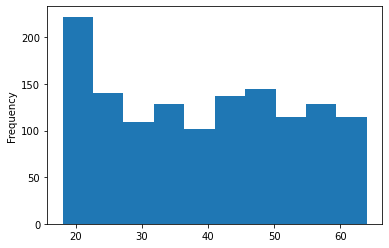

In [7]:
## Ploting Histogram related with age columns

df["age"].plot(kind="hist")


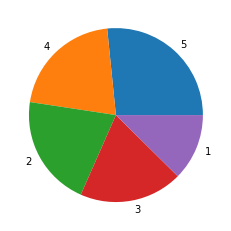

In [8]:
## Plotting Pie Chart Related with Cat_Age Columns.

plt.pie(df.cat_age.value_counts(), labels = df.cat_age.value_counts().index)
plt.show()

In [9]:
## Checking unique value related with Children columns.

df['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [10]:
## Checking all Statistical describtion of numerical coumns.

df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [11]:
## Checking DataType for all Columns.

df.dtypes

age            int64
sex           object
bmi          float64
children       int64
smoker        object
region        object
expenses     float64
cat_age     category
dtype: object

In [11]:
df['expenses'] = df['expenses'].astype('float64')
df['expenses']

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

In [12]:
df.dtypes

age            int64
sex           object
bmi          float64
children       int64
smoker        object
region        object
expenses     float64
cat_age     category
dtype: object

In [12]:
## Checking all Unique value for sex Columns.

df['sex'].unique()

array(['female', 'male'], dtype=object)

In [13]:
## Checking all Unique value for Smoker Columns.

df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [14]:
## Checking all Unique value for Regions Columns.

df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [15]:
## Here we are Checking sum of all null value, if present in any columns or nots.

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
cat_age     0
dtype: int64

In [16]:
## we are checking Correlation between all Numerical Columns.

corr = df.corr()
corr

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


<AxesSubplot:>

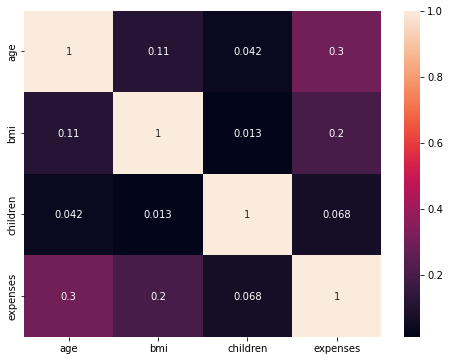

In [17]:
## Plotting Heatmap for checking correlation between all numerical columns.

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot = True)

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

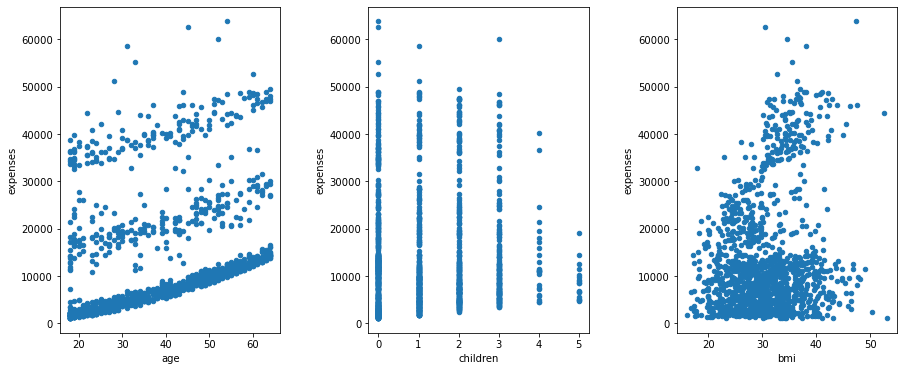

In [18]:
## here we are plotting scatter plot to find relations with expenses vs [ age, bmi, children] columns respectively.

fig, axes = plt.subplots(ncols = 3, figsize = (15,6), squeeze=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
df.plot(kind='scatter', x='age', y='expenses', ax=axes[0])
df.plot(kind='scatter', x='children', y='expenses', ax=axes[1])
df.plot(kind='scatter', x='bmi', y='expenses', ax=axes[2])

<AxesSubplot:ylabel='Frequency'>

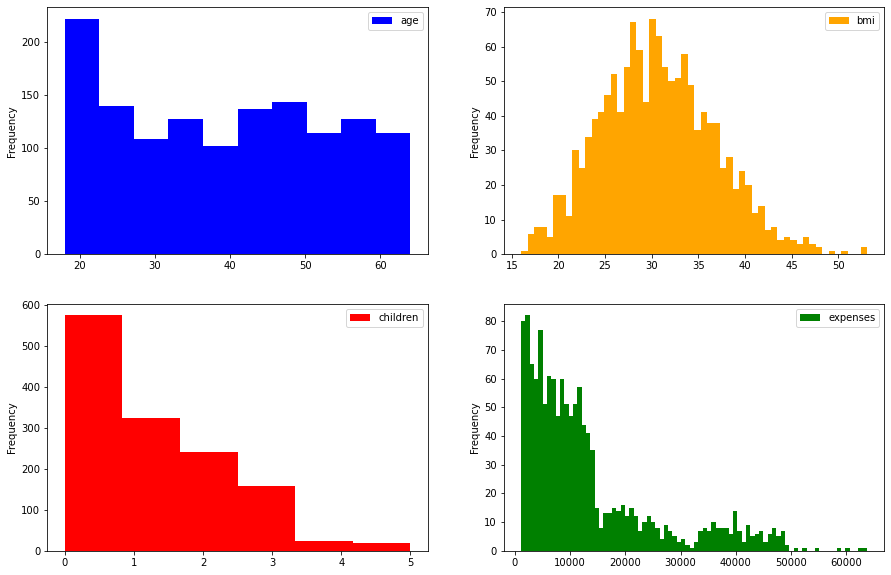

In [19]:
## Here we are plotting Histogram for [ age, bmi, children, expenses] columns.

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15,10))

df.plot(kind='hist', y='age', ax=axes[0][0], color = 'blue')
df.plot(kind='hist', y='bmi', ax=axes[0][1], color = 'orange', bins = 54)
df.plot(kind='hist', y='children', ax=axes[1][0], color = 'red', bins = 6)
df.plot(kind='hist', y='expenses', ax=axes[1][1], color = 'green', bins = 80)

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

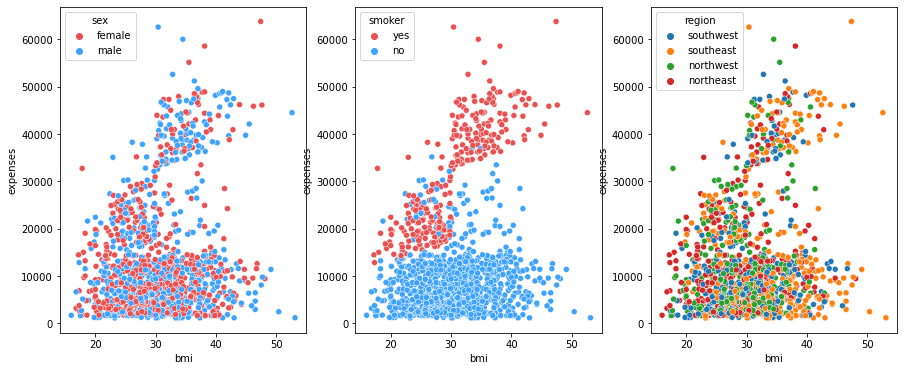

In [20]:
## here we are plotting scatterplot with x = bmi & y = expenses & relationship with hue functions on [ sex, smoker, regions].

palette=['#EB5050','#3EA2FF']
fig, axes = plt.subplots(ncols = 3, figsize = (15,6), squeeze=True)
sns.scatterplot(x='bmi', y='expenses', ax=axes[0], data=df,hue='sex', palette=palette)
sns.scatterplot(x='bmi', y='expenses', ax=axes[1], data=df,hue='smoker', palette=palette)
sns.scatterplot(x='bmi', y='expenses', ax=axes[2], data=df,hue='region')

<AxesSubplot:title={'center':'Smoker'}>

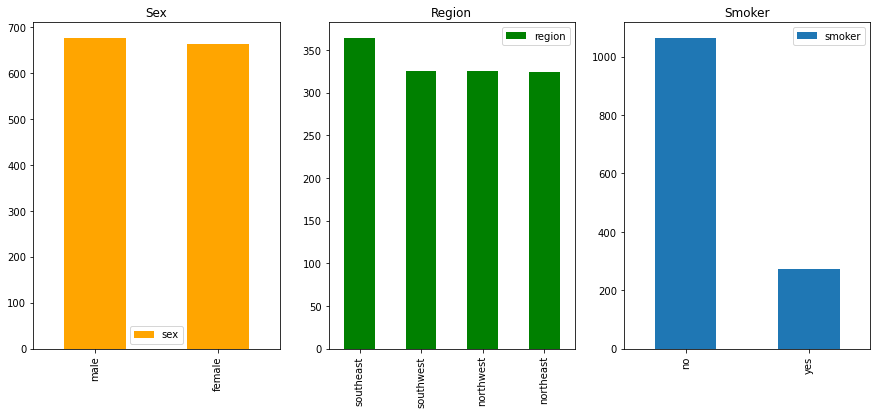

In [21]:
## Here, we are plotting count-plot realted with [ sex, region, smokers] columns respectively.

fig, axes = plt.subplots(ncols=3, figsize = (15,6))
df['sex'].value_counts().plot(kind='bar', color = 'orange', ax=axes[0],title="Sex", legend = 'sex') 
df['region'].value_counts().plot(kind='bar', color = 'green', ax=axes[1],title="Region", legend = 'region')
df['smoker'].value_counts().plot(kind='bar', ax=axes[2],title="Smoker", legend = 'smoker')


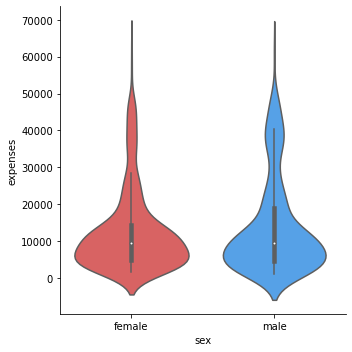

In [22]:
## Here, we are plotting violin plot for sex & Expenses.

palette=['#EB5050','#3EA2FF']
sns.catplot(x='sex', y='expenses', kind='violin', palette=palette, data=df)

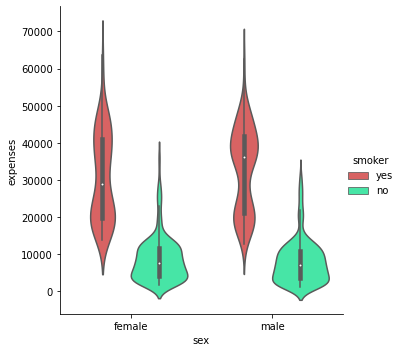

In [23]:
## Here, we are plotting violin plot realted with x = sex & y = Expenses with HUe function on "Smoker" Columns.

palette=['#EB5050','#2DFFAB'] 
sns.catplot(x='sex', y='expenses', kind='violin', hue='smoker', palette=palette, data=df)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Charges')

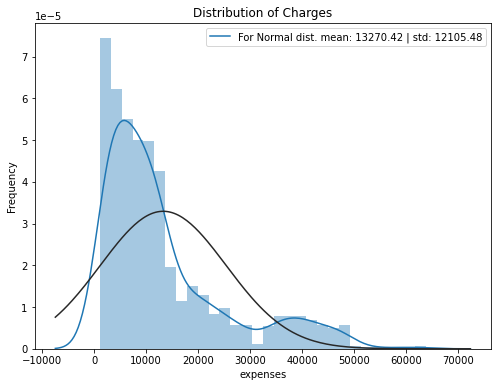

In [24]:
## Here, we are plotting Distribution- plot on Expenses columns and going checking distribution related with [ mean, std,]

from scipy import stats
from scipy.stats import norm
fig =plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.distplot(df['expenses'], fit=norm)
(mu,sigma)= norm.fit(df['expenses'])
plt.legend(['For Normal dist. mean: {:.2f} | std: {:.2f}'.format(mu,sigma)])
plt.ylabel('Frequency')
plt.title('Distribution of Charges')

# Thank You